In [ ]:
# ChatGPT : Please write the code that uses LSTM to predict value from four features.

'''
Certainly! Here is an example of how you might use a Long Short-Term Memory (LSTM) network in Python to predict a continuous value based on four input features:

This code uses the TensorFlow library to define, compile, and train an LSTM network with a single hidden layer containing 32 units. The input data has four features, so the input shape of the LSTM layer is (4, 1). The output layer is a single dense layer with a single unit, which is used to make the prediction.

The model is then compiled with the Adam optimizer and the mean squared error loss function, and it is trained on the training data using the fit method. The input data is reshaped to have a shape of (-1, 4, 1) to match the expected input shape of the LSTM layer.

After training, the model is evaluated on the test data and the test loss is printed. The model is then used to make predictions on the test data using the predict method.

This is just a simple example, and you may need to modify the code depending on the specific requirements of your problem. For example, you may need to use a different number of units in the LSTM layer, or you may need to use a different optimizer or loss function.
'''

In [ ]:
# ChatGPT : Please write the code of LSTM in python which uses 7 time steps and 4 features per time step.

'''
Certainly! Here is an example of how you might use a Long Short-Term Memory (LSTM) network in Python to process data with 7 time steps and 4 features per time step:

This code uses the TensorFlow library to define, compile, and train an LSTM network with a single hidden layer containing 32 units. The input data has 7 time steps and 4 features per time step, so the input shape of the LSTM layer is (7, 4). The output layer is a single dense layer with a single unit, which is used to make the prediction.

The model is then compiled with the Adam optimizer and the mean squared error loss function, and it is trained on the training data using the fit method. The input data is reshaped to have a shape of (-1, 7, 4) to match the expected input shape of the LSTM layer.

After training, the model is evaluated on the test data and the test loss is printed. The model is then used to make predictions on the test data using the predict method.
'''

In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from keras.metrics import MeanAbsoluteError
from sklearn.model_selection import train_test_split
from pandas import read_csv
import numpy as np

dataframe = read_csv('pollution@beijing_5years.csv', usecols = [6,7,8,10]) # TEMP 데이터 예측
print(dataframe)

dataset = dataframe.values
dataset = dataset.astype('float')
print(dataset)

print(dataset.shape)

       DEWP  TEMP    PRES     Iws
0       -21 -11.0  1021.0    1.79
1       -21 -12.0  1020.0    4.92
2       -21 -11.0  1019.0    6.71
3       -21 -14.0  1019.0    9.84
4       -20 -12.0  1018.0   12.97
...     ...   ...     ...     ...
43819   -23  -2.0  1034.0  231.97
43820   -22  -3.0  1034.0  237.78
43821   -22  -3.0  1034.0  242.70
43822   -22  -4.0  1034.0  246.72
43823   -21  -3.0  1034.0  249.85

[43824 rows x 4 columns]
[[ -21.    -11.   1021.      1.79]
 [ -21.    -12.   1020.      4.92]
 [ -21.    -11.   1019.      6.71]
 ...
 [ -22.     -3.   1034.    242.7 ]
 [ -22.     -4.   1034.    246.72]
 [ -21.     -3.   1034.    249.85]]
(43824, 4)


In [2]:
# load dataset
values = dataset
print(values)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
print(scaled_values)

#train_data, test_data = train_test_split(scaled_values, test_size = 0.2, shuffle = False)
train_data, test_data = train_test_split(values, test_size = 0.2, shuffle = False)
print(len(train_data), len(test_data))

[[ -21.    -11.   1021.      1.79]
 [ -21.    -12.   1020.      4.92]
 [ -21.    -11.   1019.      6.71]
 ...
 [ -22.     -3.   1034.    242.7 ]
 [ -22.     -4.   1034.    246.72]
 [ -21.     -3.   1034.    249.85]]
[[0.27941176 0.13114754 0.54545455 0.00229001]
 [0.27941176 0.1147541  0.52727273 0.00763907]
 [0.27941176 0.13114754 0.50909091 0.01069811]
 ...
 [0.26470588 0.26229508 0.78181818 0.41399641]
 [0.26470588 0.24590164 0.78181818 0.42086644]
 [0.27941176 0.26229508 0.78181818 0.4262155 ]]
35059 8765


In [3]:
def create_dataset(dataset, look_back) :
    x_data = []
    y_data = []
    for i in range(len(dataset) - look_back) :

        x_data_4 = []
        
        data_multi_0 = dataset[i:(i+look_back), 0]
        data_multi_1 = dataset[i:(i+look_back), 1]
        data_multi_2 = dataset[i:(i+look_back), 2]
        data_multi_3 = dataset[i:(i+look_back), 3]
        
        x_data_4.append(data_multi_0)
        x_data_4.append(data_multi_1)
        x_data_4.append(data_multi_2)
        x_data_4.append(data_multi_3)
        
        x_data.append(x_data_4)
        y_data.append(dataset[i+look_back, 1]) # TEMP 데이터 예측
    return np.array(x_data), np.array(y_data)

look_back = 7
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train)
print(y_train)

# Reshape the input data
x_train = np.transpose(x_train, (0, 2, 1))
x_test = np.transpose(x_test, (0, 2, 1))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train)
print(y_train)

(35052, 4, 7) (35052,)
(8758, 4, 7) (8758,)
[[[ -21.    -21.    -21.   ...  -20.    -19.    -19.  ]
  [ -11.    -12.    -11.   ...  -12.    -10.     -9.  ]
  [1021.   1020.   1019.   ... 1018.   1017.   1017.  ]
  [   1.79    4.92    6.71 ...   12.97   16.1    19.23]]

 [[ -21.    -21.    -21.   ...  -19.    -19.    -19.  ]
  [ -12.    -11.    -14.   ...  -10.     -9.     -9.  ]
  [1020.   1019.   1019.   ... 1017.   1017.   1017.  ]
  [   4.92    6.71    9.84 ...   16.1    19.23   21.02]]

 [[ -21.    -21.    -20.   ...  -19.    -19.    -19.  ]
  [ -11.    -14.    -12.   ...   -9.     -9.     -9.  ]
  [1019.   1019.   1018.   ... 1017.   1017.   1017.  ]
  [   6.71    9.84   12.97 ...   19.23   21.02   24.15]]

 ...

 [[ -19.    -18.    -19.   ...  -18.    -19.    -18.  ]
  [   6.      7.      7.   ...    9.      9.      9.  ]
  [1013.   1013.   1013.   ... 1011.   1011.   1012.  ]
  [  27.26   37.09   46.03 ...   65.26   73.31   83.14]]

 [[ -18.    -19.    -18.   ...  -19.    -18.  

In [4]:
# Define the model
model = Sequential()

# The input data has 7 time steps and 4 features per time step
model.add(LSTM(32, input_shape=(7, 4)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Define the (more complex) model
hyper_params = {
    "lstm_units": 64,
    "dropout": 0.2,
    "optimizer": "adam",
    "loss": "mean_squared_error",
}

def get_model(hyper_params):
    # Create the model
	model = Sequential()
    # The input data has 12 time steps and 1 features per time step
	model.add(LSTM(units=hyper_params["lstm_units"], return_sequences=True, input_shape=(12, 1)))
	model.add(Dropout(rate=hyper_params["dropout"]))
	model.add(LSTM(units=hyper_params["lstm_units"], return_sequences=True, input_shape=(12, 1)))
	model.add(Dropout(rate=hyper_params["dropout"]))
	model.add(LSTM(units=hyper_params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=hyper_params["dropout"]))
	model.add(Dense(1))
	model.compile(loss=hyper_params["loss"],
              	optimizer=hyper_params["optimizer"],
              	metrics=[MeanAbsoluteError()])
	return model

# model = get_model(hyper_params=hyper_params)

(35052, 7, 4) (35052,)
(8758, 7, 4) (8758,)


In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
1096/1096 [==============================] - 6s 4ms/step - loss: 260.3092
Epoch 2/20
1096/1096 [==============================] - 4s 4ms/step - loss: 171.9638
Epoch 3/20
1096/1096 [==============================] - 4s 4ms/step - loss: 112.0643
Epoch 4/20
1096/1096 [==============================] - 4s 4ms/step - loss: 73.6244
Epoch 5/20
1096/1096 [==============================] - 4s 4ms/step - loss: 47.7492
Epoch 6/20
1096/1096 [==============================] - 4s 4ms/step - loss: 30.6153
Epoch 7/20
1096/1096 [==============================] - 5s 4ms/step - loss: 19.5410
Epoch 8/20
1096/1096 [==============================] - 6s 5ms/step - loss: 12.7270
Epoch 9/20
1096/1096 [==============================] - 4s 4ms/step - loss: 8.7348
Epoch 10/20
1096/1096 [==============================] - 5s 4ms/step - loss: 6.2987
Epoch 11/20
1096/1096 [==============================] - 4s 4ms/step - loss: 4.8153
Epoch 12/20
1096/1096 [==============================] - 5s 4ms/step - los

dict_keys(['loss'])


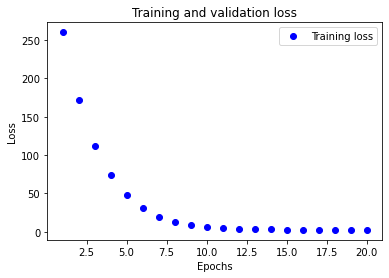

In [6]:
import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

# bo = 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss') # plot x and y using blue circle markers
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [7]:
# Make predictions on the test data
predictions = model.predict(x_test)

print(predictions)
print(y_test)

value_error = np.absolute(predictions[0] - y_test[0])

value_percent = 100 - (value_error * 100 / y_test[0])

print(value_error, "error,", value_percent, "% accuracy")

274/274 [==============================] - 1s 2ms/step
[[ 5.7341394]
 [ 4.7358704]
 [ 4.8335123]
 ...
 [-3.6324558]
 [-3.3826447]
 [-4.6164036]]
[ 6.  6.  3. ... -3. -4. -3.]
[0.26586056] error, [95.56899] % accuracy


In [8]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Calculate the mean squared error of the predictions
mse = ((predictions - y_test) ** 2).mean()

print("Mean squared error:", mse)

274/274 [==============================] - 0s 2ms/step
Mean squared error: 258.7800954643782
